This notebook provides an example for excluding the kernel from the upper left block of the GP covariance matrix. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from GP import GaussianProcessRegressor

In [11]:
datasets = 1
n = 5
N = datasets*n                  # Total number of data points
percent_error = 0.1
percent_correlation = 0
x_sets = []                     # x for each dataset
y_sets = []                     # y for each dataset

x = np.zeros(N)                 # All x
y = np.zeros(N)                 # All y

total_errors = np.zeros(N)
systematic_errors = np.zeros(N)
dataset_sizes = np.zeros(datasets)
for i in range(datasets):
    energies = np.array([j+1 for j in range(n)]) + (0.5-np.random.rand(n))
    values = 0.5-np.random.rand(n) + energies                # Provides overall linear relationship with correlated noise
    x_sets.append(energies)
    y_sets.append(values)
    
    s = percent_error*np.abs(values)
    
    for j in range(n):
        index = i*n+j
        x[index] = energies[j]
        y[index] = values[j]
        total_errors[index] = s[j] 
        systematic_errors[index] = s[j] * percent_correlation
    dataset_sizes[i] = n

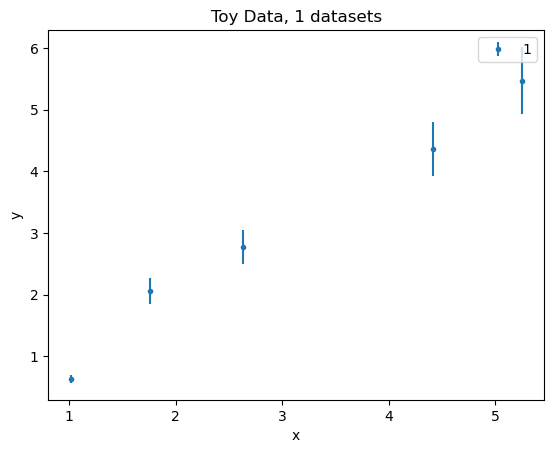

<Figure size 640x480 with 0 Axes>

In [12]:
# Plot the model data

for i in range(datasets):
    plt.errorbar(x_sets[i], y_sets[i], percent_error*np.abs(y_sets[i]), fmt='.', label=f'{i+1}')
plt.legend()
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.title(f'Toy Data, {datasets} datasets')
plt.show()
plt.clf()

In [13]:
magnitude = 1                             # Initial values for kernel hyperparameters, which get set by extremizing the log-likelihood
length_scale = 1
kernel = ConstantKernel(magnitude) * RBF(length_scale) 
#kernel = ConstantKernel(magnitude, constant_value_bounds='fixed') * RBF(length_scale, length_scale_bounds='fixed') 
correlated_gp = GaussianProcessRegressor(kernel=kernel)
uncorrelated_gp = GaussianProcessRegressor(kernel=kernel)

correlated_gp, correlated_K11 = correlated_gp.fit(x.reshape(-1,1), y, total=total_errors, norms=systematic_errors, points=dataset_sizes)
uncorrelated_gp, uncorrelated_K11 = uncorrelated_gp.fit(x.reshape(-1,1), y, total=total_errors)

num_test = 300
x_test = np.linspace(0.5, n+0.5, num_test)
correlated_mean, correlated_std = correlated_gp.predict(x_test.reshape(-1,1), return_std=True)
uncorrelated_mean, uncorrelated_std = uncorrelated_gp.predict(x_test.reshape(-1,1), return_std=True)

[0.00398754+0.j 0.04238696+0.j 0.07651405+0.j 0.19056598+0.j
 0.29906265+0.j]
[0.00398754+0.j 0.04238696+0.j 0.07651405+0.j 0.19056598+0.j
 0.29906265+0.j]


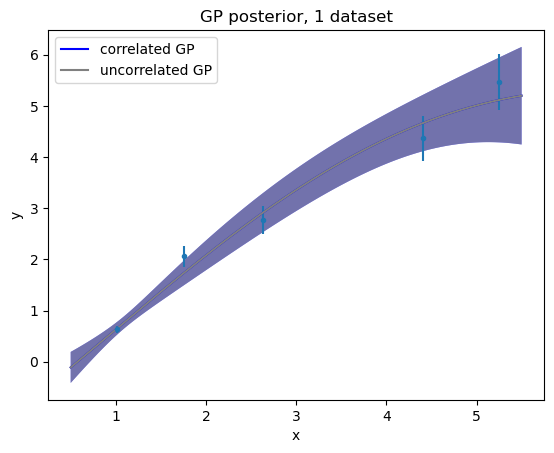

In [14]:
# Plot both posteriors

for i in range(datasets):
    plt.errorbar(x_sets[i], y_sets[i], percent_error*np.abs(y_sets[i]), fmt='.')

plt.plot(x_test, correlated_mean, color='blue', label='correlated GP')
plt.fill_between(x_test, correlated_mean - 2*correlated_std, correlated_mean + 2*correlated_std, color='blue', alpha=0.65, edgecolor='none')
plt.plot(x_test, uncorrelated_mean, color='grey', label='uncorrelated GP')
plt.fill_between(x_test, uncorrelated_mean - 2*uncorrelated_std, uncorrelated_mean + 2*uncorrelated_std, color='grey', alpha=0.65, edgecolor='none')
plt.legend()
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.title(f'GP posterior, {datasets} dataset')
plt.show()

In [15]:
magnitude = 1
length_scale = 1
kernel = ConstantKernel(magnitude, constant_value_bounds='fixed') * RBF(length_scale, length_scale_bounds='fixed') 

no_kernel_gp = GaussianProcessRegressor(kernel=kernel)
no_kernel_gp, no_kernel_K11 = no_kernel_gp.fit(x.reshape(-1,1), y, total=total_errors, norms=systematic_errors, points=dataset_sizes, train_kernel=True)
no_kernel_mean, no_kernel_std = no_kernel_gp.predict(x_test.reshape(-1,1), return_std=True)

[0.00398754+0.j 0.04238696+0.j 0.07651405+0.j 0.19056598+0.j
 0.29906265+0.j]


/Users/timlaunders/Desktop/Grad Research/BBN Code/highly_correlated_gps/GP.py:547: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  "Predicted variances smaller than 0. "


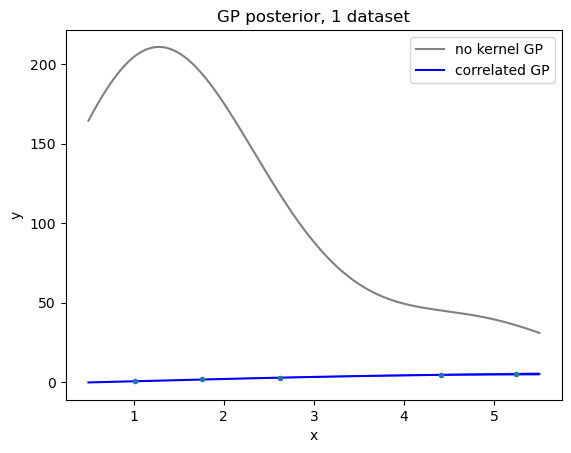

In [16]:
# Plot both posteriors

for i in range(datasets):
    plt.errorbar(x_sets[i], y_sets[i], percent_error*np.abs(y_sets[i]), fmt='.')

plt.plot(x_test, no_kernel_mean, color='grey', label='no kernel GP')
plt.fill_between(x_test, no_kernel_mean - 2*no_kernel_std, no_kernel_mean + 2*no_kernel_std, color='grey', alpha=0.65, edgecolor='none')
plt.plot(x_test, correlated_mean, color='blue', label='correlated GP')
plt.fill_between(x_test, correlated_mean - 2*correlated_std, correlated_mean + 2*correlated_std, color='blue', alpha=0.65, edgecolor='none')
plt.legend()
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.title(f'GP posterior, {datasets} dataset')
plt.show()

In [10]:
print(eigvals(correlated_K11))
print(eigvals(no_kernel_K11))

[2.5188063 +0.j 1.74921559+0.j 0.85408825+0.j 0.11262142+0.j
 0.34746855+0.j]


NameError: name 'no_kernel_K11' is not defined